# Dimensionality Reduction in Python

## PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
plty_creds = list(py.get_credentials().values())
tools.set_credentials_file(username = plty_creds[0],api_key = plty_creds[1])

In [3]:
data = pd.read_csv("Wine.csv")

In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


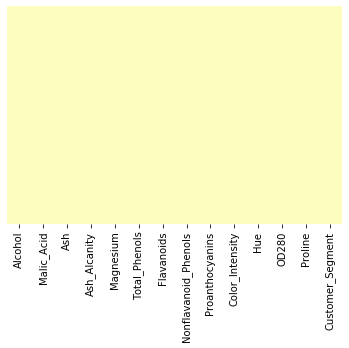

In [6]:
sns.heatmap(data.isnull(), yticklabels=False, cbar = False, cmap="magma_r")

There are no missing values in the data!

In [7]:
X = data.iloc[:,:13].values

In [8]:
y = data.iloc[:,13]

#### Creating the Train/Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scale = StandardScaler()

In [13]:
X_train = scale.fit_transform(X_train)

In [14]:
X_test = scale.transform(X_test)

### Appling PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)

In [17]:
X_train = pca.fit_transform(X_train)

In [18]:
X_test = pca.transform(X_test)

*In the original run of the code, the 'n_components' argument in the PCA initialization above was left at the default 'none'. The two below line of code were then used to review the explained variance of the 12 created PC's. After review, the 'n_components' was set to 2, so as to only include the first two PC's, which together explain approximately 54% of the variance.*

In [19]:
explained_var = pca.explained_variance_ratio_

In [20]:
explained_var

array([0.35900066, 0.18691934])

### Fitting the Logistic Regression to the Data

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
classif = LogisticRegression(random_state = 42)

In [23]:
classif.fit(X_train, y_train)

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predictions

In [24]:
preds = classif.predict(X_test)

In [25]:
preds

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1])

In [26]:
from sklearn.metrics import classification_report

In [27]:
pd.crosstab(y_test, preds, normalize = True, margins = True, 
           colnames=['Predicted Values'], rownames=['True Values - Customer Segment'])

Predicted Values,1,2,3,All
True Values - Customer Segment,,,,
1,0.388889,0.000000,0.000000,0.388889
2,0.000000,0.388889,0.000000,0.388889
3,0.000000,0.000000,0.222222,0.222222
All,0.388889,0.388889,0.222222,1.000000


In [28]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### Visualizing the Training Data

Originally, I intended to visualize the train/test data using matplotlib, an example of which is shown below. After reviewing the plots, I decided that plotly would provide a much more accessible and visually appealing display of the data, so all plots after this will be created using plotly. Plotly also has an interactive display, unlike matplotlib, although this may or may not display dynamically on github.

In [29]:
from matplotlib.colors import ListedColormap

In [30]:
X1, X2 = np.meshgrid(np.arange(start = X_train[:,0].min() - 1, stop = X_train[:,0].max() + 1, step = 0.01), 
                     np.arange(start = X_train[:,1].min() - 1, stop = X_train[:,1].max() + 1, step = 0.01))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


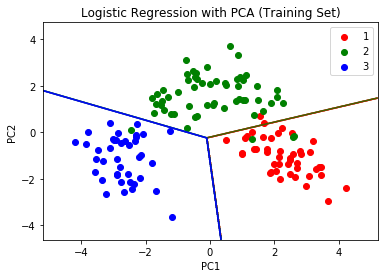

In [31]:
plt.contour(X1, X2, classif.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
           alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],
               c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression with PCA (Training Set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

In [32]:
h = .02

x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
x_ = np.arange(x_min, x_max, h)
y_ = np.arange(y_min, y_max, h)
xx, yy = np.meshgrid(x_, y_)
Z = (classif.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

trace = go.Heatmap(x=x_, y=y_, z=Z,
                   colorscale='Rainbow',
                   showscale=False,
                   opacity=.75)

trace1 = go.Scatter(x=X_train[:, 0], y=X_train[:, 1],
                    mode='markers',
                    marker=dict(color=y_train,
                                colorscale="Rainbow",
                                showscale=False,
                                line=dict(color='black', width=1)))
layout = go.Layout(title = "PCA Feature Extraction with Logistic Regression (Train Data)",
                   xaxis=dict(title='PC1', ticks=''),
                   yaxis=dict(title='PC2', ticks=''))

fig = go.Figure(data=[trace, trace1], layout=layout)

py.iplot(fig)

/home/anna/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning:

Consider using IPython.display.IFrame instead



### Visualizing the Testing Data

In [33]:
x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
x_ = np.arange(x_min, x_max, h)
y_ = np.arange(y_min, y_max, h)
xx, yy = np.meshgrid(x_, y_)
Z = (classif.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

trace = go.Heatmap(x=x_, y=y_, z=Z,
                   colorscale='Rainbow',
                   showscale=False,
                   opacity=.75)

trace1 = go.Scatter(x=X_test[:, 0], y=X_test[:, 1],
                    mode='markers',
                    marker=dict(color=y_test,
                                colorscale="Rainbow",
                                showscale=False,
                                line=dict(color='black', width=1)))
layout = go.Layout(title = "PCA Feature Extraction with Logistic Regression (Test Data)",
                   xaxis=dict(title='PC1', ticks=''),
                   yaxis=dict(title='PC2', ticks=''))

fig = go.Figure(data=[trace, trace1], layout=layout)

py.iplot(fig)

/home/anna/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning:

Consider using IPython.display.IFrame instead



PCA has done notably well for this data set. I've managed to create a model which perfectly predicted the classes of the training set. I'll now be trying a few other feature extraction techniques, to compare their effectiveness. 

## Resetting the Data Set For New Method

In [34]:
#Reset X & Y
X = data.iloc[:,:13].values
y = data.iloc[:,13]

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Scaling
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

## LDA

### Applying LDA

This is a supervised learning method, unlike PCA, so we need to fit/transform the LDA object to both the X_train and y_train sets.

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [36]:
lda = LDA(n_components=2)

In [37]:
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

### Fitting the Log Regression to the LDA Data

Note that classif is still initialized as a LogReg, so we can use that again

In [38]:
classif.fit(X_train, y_train)

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
n_classes = len(classif.classes_)

In [40]:
preds = classif.predict(X_test)

In [41]:
pd.crosstab(y_test, preds)

col_0,1,2,3
Customer_Segment,,,
1,14,0,0
2,0,13,1
3,0,0,8


In [42]:
pd.crosstab(y_test, preds, normalize = True, margins = True)

col_0,1,2,3,All
Customer_Segment,,,,
1,0.388889,0.000000,0.000000,0.388889
2,0.000000,0.361111,0.027778,0.388889
3,0.000000,0.000000,0.222222,0.222222
All,0.388889,0.361111,0.250000,1.000000


In [43]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.93      0.96        14
           3       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



Again it seems that we have created a perfect model for predicting the data set

### Visualizing the Training Data

In [44]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
x_ = np.arange(x_min, x_max, h)
y_ = np.arange(y_min, y_max, h)
xx, yy = np.meshgrid(x_, y_)
Z = (classif.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

trace = go.Heatmap(x=x_, y=y_, z=Z,
                   colorscale='Rainbow',
                   showscale=False,
                   opacity=.75)

trace1 = go.Scatter(x=X_train[:, 0], y=X_train[:, 1],
                    mode='markers',
                    marker=dict(color=y_train,
                                colorscale="Rainbow",
                                showscale=False,
                                line=dict(color='black', width=1)))
layout = go.Layout(title = "LDA Feature Extraction with Logistic Regression (Train Data)",
                   xaxis=dict(title='LD1', ticks=''),
                   yaxis=dict(title='LD2', ticks=''))

fig = go.Figure(data=[trace, trace1], layout=layout)

py.iplot(fig)

/home/anna/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning:

Consider using IPython.display.IFrame instead



### Visualizing the Test Data

In [45]:
x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
x_ = np.arange(x_min, x_max, h)
y_ = np.arange(y_min, y_max, h)
xx, yy = np.meshgrid(x_, y_)
Z = (classif.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

trace = go.Heatmap(x=x_, y=y_, z=Z,
                   colorscale='Rainbow',
                   showscale=False,
                   opacity=.75)

trace1 = go.Scatter(x=X_test[:, 0], y=X_test[:, 1],
                    mode='markers',
                    marker=dict(color=y_test,
                                colorscale="Rainbow",
                                showscale=False,
                                line=dict(color='black', width=1)))
layout = go.Layout(title = "LDA Feature Extraction with Logistic Regression (Test Data)",
                   xaxis=dict(title='LD1', ticks=''),
                   yaxis=dict(title='LD2', ticks=''))

fig = go.Figure(data=[trace, trace1], layout=layout)

py.iplot(fig)

/home/anna/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning:

Consider using IPython.display.IFrame instead



## Resetting the Data Set For New Methods

In [48]:
#Reset X & Y
X = data.iloc[:,:13].values
y = data.iloc[:,13]

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44)

#Scaling
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

## Kernal PCA


For the Kernal PCA We will be using a different data set than the first two problems. As such, I'll need to preform some preprocessing, as I did in the first two methods. This will be more condensed here, to avoid unnecessary redundancy.

### Applying Kernal PCA

In [87]:
data_sn = pd.read_csv("Social_Network_Ads.csv")

In [88]:
data_sn.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [89]:
data_sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null float64
EstimatedSalary    400 non-null float64
Purchased          400 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 15.7+ KB


In [90]:
data_sn['Gender_Male'] = pd.get_dummies(data_sn['Gender'], drop_first=True)
data_sn.drop("Gender", axis = 1, inplace=True)

In [91]:
data_sn = data_sn[['User ID', 'Age', 'EstimatedSalary', 'Gender_Male', 'Purchased']]

In [92]:
data_sn.head()

,User ID,Age,EstimatedSalary,Gender_Male,Purchased
0,15624510,19.0,19000.0,1,0
1,15810944,35.0,20000.0,1,0
2,15668575,26.0,43000.0,0,0
3,15603246,27.0,57000.0,0,0
4,15804002,19.0,76000.0,1,0


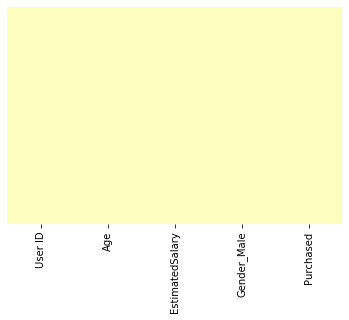

In [93]:
sns.heatmap(data_sn.isnull(), yticklabels=False, cbar = False, cmap="magma_r")

### Reviewing the Classification Without Kernal PCA

So, in order to best see the effects of Kernal PCA, it is very useful to first visualize what would happen if we fit a logistic regression model directly to the data as we have it.

#### Data Preprocessing

In [94]:
X = data_sn.iloc[:, 1:4].values
y = data_sn.iloc[:,-1].values

In [95]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [96]:
#Scaling
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

#### Fitting the Log Reg without Kernal PCA

In [97]:
classif.fit(X_train, y_train)

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
classif.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>

In [99]:
preds = classif.predict(X_test)

In [103]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        50
           1       0.87      0.67      0.75        30

    accuracy                           0.84        80
   macro avg       0.85      0.80      0.82        80
weighted avg       0.84      0.84      0.83        80



In [110]:
classif.predict_log_proba(X_test)

array([[-8.62547192e-01, -5.48329481e-01],
       [-5.71736815e-01, -8.31361700e-01],
       [-3.75478246e-01, -1.16142642e+00],
       [-1.51421482e-02, -4.19783467e+00],
       [-2.66373564e-01, -1.45308765e+00],
       [-1.73156080e-01, -1.83889096e+00],
       [-2.67170064e-02, -3.63578374e+00],
       [-3.18566810e+00, -4.22298706e-02],
       [-8.36719984e-01, -5.67623277e-01],
       [-2.73359131e-01, -1.43053680e+00],
       [-6.57497103e-02, -2.75459475e+00],
       [-5.89983453e-01, -8.08191000e-01],
       [-1.43700231e+00, -2.71335162e-01],
       [-2.09264269e-02, -3.87718744e+00],
       [-9.14537465e-02, -2.43730034e+00],
       [-2.29498577e+00, -1.06208461e-01],
       [-3.89909171e-02, -3.26385867e+00],
       [-8.61305390e-02, -2.49464742e+00],
       [-6.93804699e-02, -2.70263954e+00],
       [-1.54919595e-01, -1.94130903e+00],
       [-4.83031020e-02, -3.05431383e+00],
       [-2.04645297e-01, -1.68705533e+00],
       [-5.96845185e-03, -5.12425045e+00],
       [-1.

In [118]:
def data_to_plotly(x):
    k = []
    
    for i in range(0, len(x)):
        k.append(x[i][0])
        
    return k

In [120]:
reds = y_test == 0
blues = y_test == 1

projection_kpca1 = go.Scatter(x=X_test[reds, 0], 
                              y=X_test[reds, 1],
                              mode='markers',
                              showlegend=False,
                              marker=dict(color='red',
                                          line=dict(color='black', width=1)) 
                             )

projection_kpca2 = go.Scatter(x=X_test[blues, 0], 
                              y=X_test[blues, 1], 
                              mode='markers',
                              showlegend=False,
                              marker=dict(color='blue',
                                          line=dict(color='black', width=1))  
                             )

trace3 = go.Scatter(x= X_test,
                    y = classif.predict_log_proba(X_test),
                    mode='lines',
                    line=dict(color='blue', width=3))

layout = go.Layout(title = "Kernal PCA Feature Extraction with Logistic Regression (Test Data)",
                   xaxis=dict(title='PC1', ticks=''),
                   yaxis=dict(title='PC2', ticks=''))

fig = go.Figure(data=[projection_kpca1, projection_kpca2, trace3], layout=layout)

py.iplot(figure_or_data= fig)

/home/anna/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning:

Consider using IPython.display.IFrame instead



### Applying Kernal PCA

#### Quickly Reset Data

In [66]:
X = data.iloc[:, 1:4].values
y = data.iloc[:,-1].values

In [67]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [68]:
#Scaling
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

And here we have the actual application of the KPCA

In [69]:
from sklearn.decomposition import KernelPCA

In [70]:
kpca = KernelPCA(n_components=2, kernel= 'rbf')

In [71]:
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

### Fitting the Log Regression

As before, there is already an initialized LogReg object above which we will be using for the model.  

In [72]:
classif.fit(X_train, y_train)
preds = classif.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        50
           1       0.88      0.70      0.78        30

    accuracy                           0.85        80
   macro avg       0.86      0.82      0.83        80
weighted avg       0.85      0.85      0.85        80



/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In the two plots below, the two axises displayed in the plot are inherently representative of the split on the class and the two partial components derived using Kernal PCA.

### Visualizing the Training Data - KPCA

In [73]:
reds = y_train == 0
blues = y_train == 1

fig = tools.make_subplots()

projection_kpca1 = go.Scatter(x=X_train[reds, 0], 
                              y=X_train[reds, 1],
                              mode='markers',
                              showlegend=False,
                              marker=dict(color='red',
                                          line=dict(color='black', width=1)) 
                             )

projection_kpca2 = go.Scatter(x=X_train[blues, 0], 
                              y=X_train[blues, 1], 
                              mode='markers',
                              showlegend=False,
                              marker=dict(color='blue',
                                          line=dict(color='black', width=1))  
                             )

fig.append_trace(projection_kpca1, 1, 1)
fig.append_trace(projection_kpca2, 1, 1)

py.iplot(figure_or_data= fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]



/home/anna/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning:

Consider using IPython.display.IFrame instead



In [74]:
reds = y_test == 0
blues = y_test == 1

fig = tools.make_subplots()

projection_kpca1 = go.Scatter(x=X_test[reds, 0], 
                              y=X_test[reds, 1],
                              mode='markers',
                              showlegend=False,
                              marker=dict(color='red',
                                          line=dict(color='black', width=1)) 
                             )

projection_kpca2 = go.Scatter(x=X_test[blues, 0], 
                              y=X_test[blues, 1], 
                              mode='markers',
                              showlegend=False,
                              marker=dict(color='blue',
                                          line=dict(color='black', width=1))  
                             )

fig.append_trace(projection_kpca1, 1, 1)
fig.append_trace(projection_kpca2, 1, 1)

py.iplot(figure_or_data= fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]

